# My Next Movie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv("movies.csv")

In [3]:
ratings = pd.read_csv("ratings.csv")

In [4]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [5]:
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


## Exploratory Data Analysis

In [6]:
# combining the above dataframes

merged_df = ratings.merge(movies, on = 'movieId')


In [7]:
merged_df

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama
...,...,...,...,...,...,...
105334,668,140098,2.5,1450415424,Runoff (2015),Drama
105335,668,140816,2.5,1443288791,Tangerine (2015),Comedy|Drama
105336,668,141472,2.5,1442679119,The 50 Year Argument (2014),(no genres listed)
105337,668,142488,4.0,1451535844,Spotlight (2015),Thriller


In [8]:
new_df = merged_df[['userId','movieId','title','genres','rating']]

In [9]:
new_df

,userId,movieId,title,genres,rating
0,1,16,Casino (1995),Crime|Drama,4.0
1,9,16,Casino (1995),Crime|Drama,4.0
2,12,16,Casino (1995),Crime|Drama,1.5
3,24,16,Casino (1995),Crime|Drama,4.0
4,29,16,Casino (1995),Crime|Drama,3.0
...,...,...,...,...,...
105334,668,140098,Runoff (2015),Drama,2.5
105335,668,140816,Tangerine (2015),Comedy|Drama,2.5
105336,668,141472,The 50 Year Argument (2014),(no genres listed),2.5
105337,668,142488,Spotlight (2015),Thriller,4.0


In [10]:
new_df['genres'].shape

(105339,)

### Finding unique UserIds and Movies

In [11]:
# Unique User Ids
new_df['userId'].unique()


array([  1,   9,  12,  24,  29,  31,  47,  60,  62,  88, 104, 109, 113,
       122, 128, 137, 149, 164, 167, 177, 184, 188, 190, 192, 202, 205,
       207, 213, 224, 234, 235, 236, 238, 246, 257, 261, 268, 269, 270,
       303, 310, 326, 330, 354, 364, 366, 376, 385, 386, 399, 403, 405,
       409, 413, 416, 422, 434, 438, 458, 459, 461, 464, 469, 473, 475,
       493, 499, 534, 541, 549, 558, 563, 567, 569, 575, 576, 584, 603,
       615, 625, 627, 628, 659, 668,  27,  46,  98, 118, 130, 156, 199,
       201, 220, 239, 429, 436, 487, 496, 500, 544, 552, 561, 607, 612,
       646, 662, 666,   2,   4,   7,   8,  16,  22,  42,  44,  54,  59,
        61,  63,  66,  69,  71,  72,  74,  77,  87,  89,  92, 102, 107,
       116, 119, 126, 132, 134, 140, 143, 148, 151, 157, 158, 160, 161,
       168, 169, 170, 174, 175, 179, 181, 189, 195, 203, 221, 228, 232,
       233, 241, 242, 244, 250, 251, 255, 259, 262, 271, 274, 276, 280,
       283, 284, 296, 305, 308, 311, 315, 321, 328, 335, 339, 34

In [12]:
new_df['userId'].nunique()

668

In [13]:
# Unique Movies
new_df['title'].unique()

array(['Casino (1995)', 'Powder (1995)',
       'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', ...,
       'The 50 Year Argument (2014)', 'Spotlight (2015)',
       'Pawn Sacrifice (2015)'], dtype=object)

In [14]:
new_df['title'].nunique()

10323

**There are 668 unique users and 10323 unique movies in the given dataset.**

In [15]:
new_df['genres'] = new_df['genres'].str.split("|")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4296\77632958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['genres'] = new_df['genres'].str.split("|")


In [16]:
new_df

,userId,movieId,title,genres,rating
0,1,16,Casino (1995),"[Crime, Drama]",4.0
1,9,16,Casino (1995),"[Crime, Drama]",4.0
2,12,16,Casino (1995),"[Crime, Drama]",1.5
3,24,16,Casino (1995),"[Crime, Drama]",4.0
4,29,16,Casino (1995),"[Crime, Drama]",3.0
...,...,...,...,...,...
105334,668,140098,Runoff (2015),[Drama],2.5
105335,668,140816,Tangerine (2015),"[Comedy, Drama]",2.5
105336,668,141472,The 50 Year Argument (2014),[(no genres listed)],2.5
105337,668,142488,Spotlight (2015),[Thriller],4.0


In [17]:
# checking the null values
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   105339 non-null  int64  
 1   movieId  105339 non-null  int64  
 2   title    105339 non-null  object 
 3   genres   105339 non-null  object 
 4   rating   105339 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**There are no null values present in the data.**

In [18]:
new_df.groupby('title')['rating'].mean().sort_values( ascending = False)

title
Saddest Music in the World, The (2003)    5.0
Interstate 60 (2002)                      5.0
Gunfighter, The (1950)                    5.0
Heima (2007)                              5.0
Limelight (1952)                          5.0
                                         ... 
Cold Weather (2010)                       0.5
Life During Wartime (2009)                0.5
Dark Days (2000)                          0.5
Biker Boyz (2003)                         0.5
Trog (1970)                               0.5
Name: rating, Length: 10323, dtype: float64

**Above code shows the average number of ratings however it doesn't shows the total users who have rated the movie. For this we are going to sort the data based on number of users who have given the ratings for a particular movie.**

In [19]:
new_df.groupby('title')['rating'].count().sort_values(ascending = False)

title
Pulp Fiction (1994)                          325
Forrest Gump (1994)                          311
Shawshank Redemption, The (1994)             308
Jurassic Park (1993)                         294
Silence of the Lambs, The (1991)             290
                                            ... 
Kind Lady (1935)                               1
Killing of Sister George, The (1968)           1
Killing Season (2013)                          1
Killer Klowns from Outer Space (1988)          1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 10323, dtype: int64

**Now we have got the number of users who have rated the particular movie.**

### Average Ratings and Total Movies at genre level.

In [20]:
Avg_Rating = pd.DataFrame(new_df.groupby('title')['rating'].mean())
Avg_Rating

,rating
title,
'71 (2014),3.500000
'Hellboy': The Seeds of Creation (2004),3.000000
'Round Midnight (1986),2.500000
'Til There Was You (1997),4.000000
"'burbs, The (1989)",3.125000
...,...
loudQUIETloud: A Film About the Pixies (2006),4.500000
xXx (2002),2.958333
xXx: State of the Union (2005),2.071429


In [21]:
Avg_Rating['ratingCount'] = pd.DataFrame(new_df.groupby('title')['rating'].count())
Avg_Rating

,rating,ratingCount
title,,
'71 (2014),3.500000,1
'Hellboy': The Seeds of Creation (2004),3.000000,1
'Round Midnight (1986),2.500000,1
'Til There Was You (1997),4.000000,3
"'burbs, The (1989)",3.125000,20
...,...,...
loudQUIETloud: A Film About the Pixies (2006),4.500000,1
xXx (2002),2.958333,24
xXx: State of the Union (2005),2.071429,7


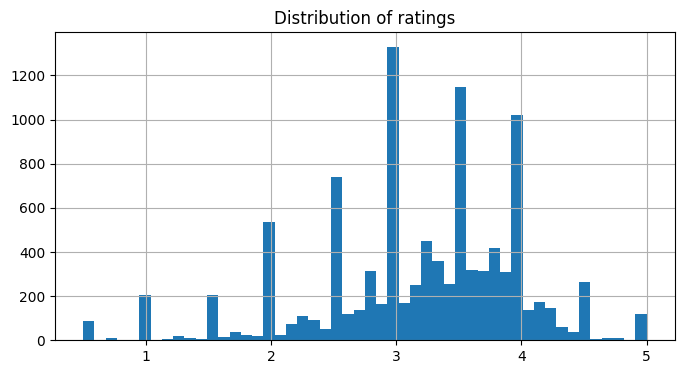

In [22]:
plt.figure(figsize = (8,4))
Avg_Rating['rating'].hist(bins = 50)
plt.title("Distribution of ratings")
plt.show()

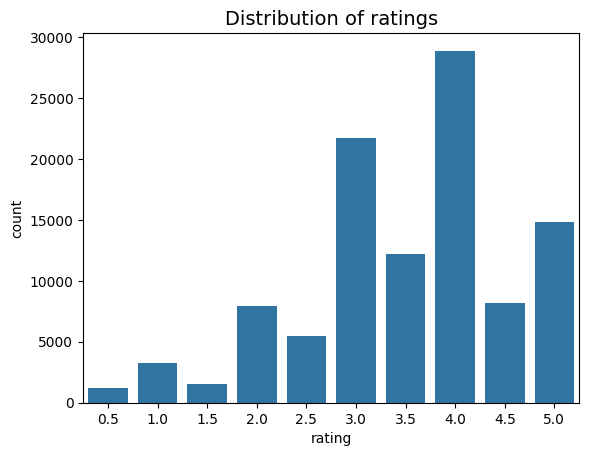

In [23]:
sns.countplot(x = 'rating', data = new_df)
plt.title("Distribution of ratings", fontsize = 14)
plt.show()

**From the above histogram and the bar plot it can be seen that maximum number of ratings given by the user are in between 3 and 4. Also there are few outliers, apart from those the average rating column is following normal distribution.**

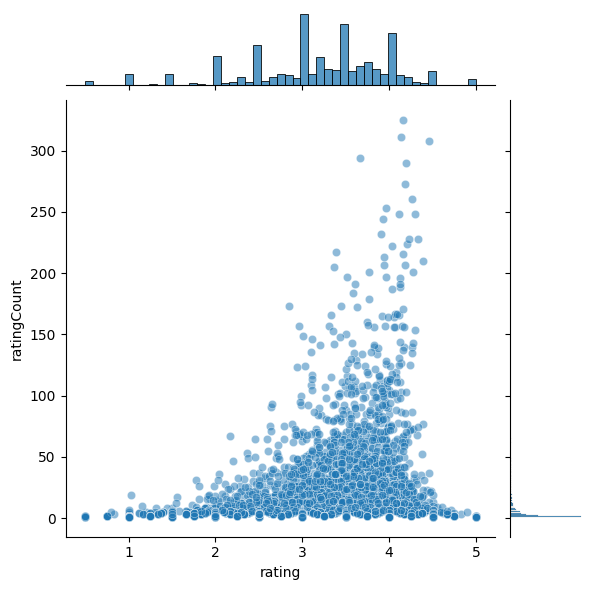

In [24]:
sns.jointplot(x ='rating', y = 'ratingCount', data = Avg_Rating , alpha = 0.5)
plt.show()

**Jointplot helps you to give the scatter plot along with the distribution based on histogram. With respect to number of ratings wherever the points are dense are the points representing the maximum number of ratings.**

#### Total movies at genre level along with unique genres considered.

In [25]:
new_df['title'] = new_df['title'].str.split('(', n=1).str[0].str.strip()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4296\3036913963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title'] = new_df['title'].str.split('(', n=1).str[0].str.strip()


In [26]:
new_df.rename(columns = {"title":"Movie_Title"}, inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4296\3110895115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns = {"title":"Movie_Title"}, inplace = True)


In [27]:
#new_df
exploded_genre = new_df.explode('genres')
exploded_genre

,userId,movieId,Movie_Title,genres,rating
0,1,16,Casino,Crime,4.0
0,1,16,Casino,Drama,4.0
1,9,16,Casino,Crime,4.0
1,9,16,Casino,Drama,4.0
2,12,16,Casino,Crime,1.5
...,...,...,...,...,...
105335,668,140816,Tangerine,Comedy,2.5
105335,668,140816,Tangerine,Drama,2.5
105336,668,141472,The 50 Year Argument,(no genres listed),2.5
105337,668,142488,Spotlight,Thriller,4.0


In [29]:
genre_counts = exploded_genre['genres'].value_counts().reset_index()
genre_counts

,genres,count
0,Drama,46960
1,Comedy,38055
2,Action,31205
3,Thriller,29288
4,Adventure,23076
5,Romance,19094
6,Crime,18291
7,Sci-Fi,16795
8,Fantasy,10889
9,Mystery,8320


**Above dataframe gives the total number of movies based on genres along with unique genres considered.**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4296\2974803992.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'genres', y= 'count', data = genre_counts,palette = 'bright')


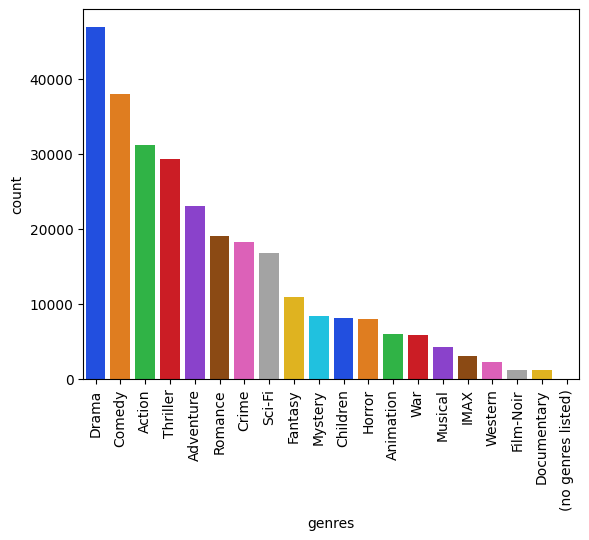

In [30]:
sns.barplot(x = 'genres', y= 'count', data = genre_counts,palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

**Above bar plot shows the distribution of movies based on genre level.**

## Popularity-Based Recommendation System at Genre Level

In [ ]:
#df_genre = exploded_genre[exploded_genre['genres'] == 'Action']
#df_genre

#### For the popularity based recommendation system use the following function:

In [34]:

def popularMovieRecc(name: str, numReviews: int, numRecc: int ):
    # Filtering the dataframe based on genre
    exploded_genre = new_df.explode('genres')
    df_genre = exploded_genre[exploded_genre['genres'] == name]
    # Calculating the average rating based on genre
    avgRating = pd.DataFrame(df_genre.groupby('Movie_Title')['rating'].mean())
    avgRating.dropna(inplace = True)
    avgRating.rename(columns= {'rating': 'Avg_Rating'}, inplace = True)
    # Sorting the ratings in descending order
    avgRating['Num_Reviews'] = pd.DataFrame(df_genre.groupby('Movie_Title')['rating'].count().sort_values(ascending = False))
    # Calculating the popularity threshold
    popularity_threshold = numReviews
    popular_movie = avgRating.query('Num_Reviews >= @popularity_threshold')
    # Sorting the values based on number of rewiews and average rating and returning the sorted dataframe
    popular = popular_movie.sort_values(by =['Num_Reviews','Avg_Rating'],ascending = [False, False]).reset_index().head(numRecc)
    popular.reset_index(drop=True, inplace=True)
    popular.index += 1
    return(popular)

# Example for the popularity based recommendation system
genre = input("Enter the genre of the movie: ")
reviews = int(input("Enter the number of reviews: "))
recommendations = int(input("Enter the number of recommendations for required type of movie: "))
print("Top {} recommended movies for the {} genre: \n".format(recommendations,genre))

# Sometimes the fuction might recommend less number of movies as compared to the number of recommendations passed.
# In such times reduce the number of rewiews and see the results again, since few genres do not have a bigger threshod value.

popularMovieRecc(genre,reviews,recommendations)

Enter the genre of the movie:  Comedy
Enter the number of reviews:  100
Enter the number of recommendations for required type of movie:  6


Top 6 recommended movies for the Comedy genre: 



,Movie_Title,Avg_Rating,Num_Reviews
1,Pulp Fiction,4.160000,325
2,Forrest Gump,4.138264,311
3,Toy Story,3.907328,232
4,Back to the Future,3.943662,213
5,Fargo,4.271144,201
6,Aladdin,3.602094,191


## Content Based Recommendation System

In [ ]:
# Trying to change the genres in lower case since cosine similarity requires the genre in lower case

#movieSet = new_df.drop_duplicates(subset = ['Movie_Title'])
#movieSet
#movieSet['genres']
#movieSet['Genres'] = genreLowerCase
#movieSet.drop(columns = 'genres' , inplace = True)
#movieSet.reset_index(drop = True, inplace = True)
#movieSet.set_index('Movie_Title', inplace =True)
#movieSet

### Use the following function for content based recommendation system: 

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
count_vect = CountVectorizer()

def contentBasedRecc(name: str, recc: int):
    # Deleting the duplicate movie titles
    movieSet = new_df.drop_duplicates(subset = ['Movie_Title'])
    # Converting the genre in lower case to compute the cosine based similarity
    genreLowerCase = [' '.join(genre.lower() for genre in genres) for genres in movieSet['genres']]
    movieSet['Genres'] = genreLowerCase
    movieSet.drop(columns = 'genres' , inplace = True)
    movieSet.reset_index(drop = True, inplace = True)
    movieSet.set_index('Movie_Title', inplace =True)
    # Checking if input movie title exists in the dataset
    if name not in movieSet.index:
        print("Movie '{}' not found in the dataset.".format(name))
        return None

    # Filtering the genres using count vectorizer
    movie_matrix = count_vect.fit_transform(movieSet['Genres'])
    # Compute cosine similarity matrix
    similarMoviesMatrix = cosine_similarity(movie_matrix,movie_matrix)
    # Get index of input movie title
    movieIndex = movieSet.index.get_loc(name)
    # Find indices of similar movies
    similarMovieIndices = similarMoviesMatrix[movieIndex].argsort()[-recc:][::-1]
    # Get recommended movie titles
    recommendedMovies = [movieSet.iloc[i].name for i in similarMovieIndices]
    return pd.DataFrame(recommendedMovies, index=np.arange(1, recc+1), columns={'Recommended Movies': recommendedMovies})

# Example for content based recommendation system
movieTitle = input('Enter the name of the movie: ')
recommendations = int(input('Enter the number of recommendations you prefer: '))
print("Top {} recommended movies similar to {}: \n".format(recommendations, movieTitle))

contentBasedRecc(movieTitle, recommendations)


Enter the name of the movie:  Toy Story
Enter the number of recommendations you prefer:  7


Top 7 recommended movies similar to Toy Story: 



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4296\479161328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movieSet['Genres'] = genreLowerCase
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4296\479161328.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movieSet.drop(columns = 'genres' , inplace = True)


,Recommended Movies
1,"Adventures of Rocky and Bullwinkle, The"
2,"Boxtrolls, The"
3,Toy Story 2
4,"Wild, The"
5,"Emperor's New Groove, The"
6,DuckTales: The Movie - Treasure of the Lost Lamp
7,Turbo


In [ ]:
#movieSet.index.get_loc("Jurassic Park")

## Collaboration Based Recommendor System

In [31]:
new_df

,userId,movieId,Movie_Title,genres,rating
0,1,16,Casino,"[Crime, Drama]",4.0
1,9,16,Casino,"[Crime, Drama]",4.0
2,12,16,Casino,"[Crime, Drama]",1.5
3,24,16,Casino,"[Crime, Drama]",4.0
4,29,16,Casino,"[Crime, Drama]",3.0
...,...,...,...,...,...
105334,668,140098,Runoff,[Drama],2.5
105335,668,140816,Tangerine,"[Comedy, Drama]",2.5
105336,668,141472,The 50 Year Argument,[(no genres listed)],2.5
105337,668,142488,Spotlight,[Thriller],4.0


### Use the following function for collaboritve filtering

In [33]:
def collaborativeBasedRecc(UserId: int, similarUsers: int, reccomendations: int):
    # Creating a pivot table to calculate correlation between different users
    movie_df =  new_df.pivot_table(index = 'Movie_Title', columns = 'userId', values = 'rating').dropna(thresh = 5, axis = 0).fillna(0)

    # Calculating correlation using pearson correlation as it gives weighted cosine similarity which tends to give more acuracy than 
     # cosine similarity
    similarity_Scores = movie_df.corr(method = 'pearson')

    # Calculating weighted avearage rating 
    avg_Rating_Per_User = new_df.groupby('userId')['rating'].mean().round(2).reset_index()
    selected_User = pd.DataFrame(similarity_Scores[UserId]).merge(avg_Rating_Per_User, on = 'userId').reset_index(drop = True)
    weighted_Matrix = selected_User * avg_Rating_Per_User
    weighted_Users = weighted_Matrix.drop(UserId)
    similar_User_Ratings = movie_df[weighted_Users.reindex(similarity_Scores.index).index]
    aggregated_Ratings = similar_User_Ratings.mean(axis=1).sort_values(ascending=False)
   
    # Recommend the top N movies with the highest aggregated ratings
    top_N_Recommendations = pd.DataFrame(aggregated_Ratings.head(reccomendations))
    
    return top_N_Recommendations

# Example for user based collaborative filtering
id = int(input("Enter the UserId: "))
threshold = int(input("Enter the number of similar users to be considered: "))
similarMovies = int(input("Enter the number of similar movies you wish: "))
topMovies = collaborativeBasedRecc(id, threshold, similarMovies)

print("Top {} recommended movies for user {}: \n{}".format(similarMovies, id, topMovies))







Enter the UserId:  5
Enter the number of similar users to be considered:  100
Enter the number of similar movies you wish:  6


Top 6 recommended movies for user 5: 
                                           0
Movie_Title                                 
Shawshank Redemption, The           2.053892
Pulp Fiction                        2.023952
Forrest Gump                        1.926647
Silence of the Lambs, The           1.821108
Star Wars: Episode IV - A New Hope  1.711826
Matrix, The                         1.666168
